# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [2]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [3]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

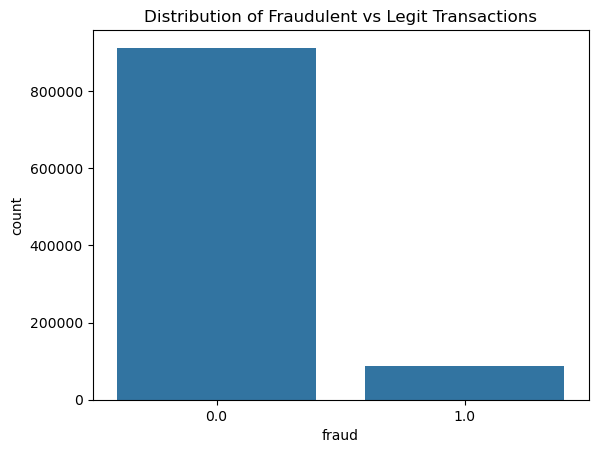

Fraud Percentage: 
fraud
0.0    91.2597
1.0     8.7403
Name: proportion, dtype: float64

Original Model Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    273871
         1.0       0.89      0.60      0.72     26129

    accuracy                           0.96    300000
   macro avg       0.93      0.80      0.85    300000
weighted avg       0.96      0.96      0.95    300000

Confusion Matrix:
 [[271914   1957]
 [ 10463  15666]]
SMOTE Model Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.93      0.96    273871
         1.0       0.57      0.95      0.72     26129

    accuracy                           0.93    300000
   macro avg       0.78      0.94      0.84    300000
weighted avg       0.96      0.93      0.94    300000

Undersampling Model Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      

In [4]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Step 1: Load the dataset
url = 'https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv'
data = pd.read_csv(url)

# Check the distribution of the target variable 'fraud'
sns.countplot(x='fraud', data=data)
plt.title('Distribution of Fraudulent vs Legit Transactions')
plt.show()

# Calculate the percentage of fraud transactions
fraud_percentage = data['fraud'].value_counts(normalize=True) * 100
print(f"Fraud Percentage: \n{fraud_percentage}\n")

# Step 2: Train a Logistic Regression Model
# Feature columns (excluding the target variable 'fraud')
X = data.drop('fraud', axis=1)

# Target variable
y = data['fraud']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Original Model Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Step 3: Run Oversampling (SMOTE)
# Apply SMOTE for oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train Logistic Regression on SMOTE balanced data
model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

# Predictions
y_pred_smote = model_smote.predict(X_test_scaled)

# Evaluate the model with SMOTE
print("SMOTE Model Classification Report:\n", classification_report(y_test, y_pred_smote))

# Step 4: Run Undersampling
# Apply undersampling
undersample = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersample.fit_resample(X_train_scaled, y_train)

# Train Logistic Regression on Undersampled data
model_under = LogisticRegression()
model_under.fit(X_train_under, y_train_under)

# Predictions
y_pred_under = model_under.predict(X_test_scaled)

# Evaluate the model with Undersampling
print("Undersampling Model Classification Report:\n", classification_report(y_test, y_pred_under))
